In [2]:
import fastai
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

from fastai.transforms import transforms_side_on
from fastai.conv_learner import ImageClassifierData, get_cv_idxs, resnet34, resnet50, tfms_from_model, ConvLearner, vgg16
from fastai.metrics import f1
from sklearn.metrics import f1_score, confusion_matrix

In [5]:
df = pd.read_csv('../data/train/train.csv')
n = len(df)
n

89896

In [6]:
df2 = pd.read_csv('../data/train/train.csv')
n = len(df2)
n

89896

In [299]:
model = resnet50
# model = vgg16
tfms = tfms_from_model(model, 64, aug_tfms=transforms_side_on, max_zoom=1.05)

data_loader = ImageClassifierData.from_csv(
    path='../data',
    folder='train',
    csv_fname='../data/train/train.csv',
    bs=32,
    test_name='test',
    skip_header=True,
    suffix='.jpg',
    val_idxs=get_cv_idxs(n, val_pct=0.2),
    tfms=tfms
)

learn = ConvLearner.pretrained(model, data)

AttributeError: 'list' object has no attribute 'c'

 94%|█████████▍| 2115/2248 [03:50<00:14,  9.16it/s, loss=0.333]

/home/josh/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


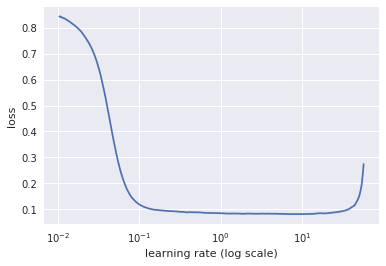

In [123]:
learn.lr_find(start_lr=0.01, end_lr=100)
learn.sched.plot()

In [133]:
learn.fit(0.05, 3, cycle_len=1, cycle_mult=2, metrics=[f1])

epoch      trn_loss   val_loss   f1         
    0      0.090521   0.083472   0.276425  
    1      0.085642   0.079007   0.299805  
    2      0.083811   0.078469   0.30334   
    3      0.081992   0.076827   0.315853  
    4      0.080975   0.076031   0.32226   
    5      0.080113   0.075851   0.322314  
    6      0.080362   0.07567    0.327049  



[array([ 0.07567]), 0.32704900048774987]

In [134]:
learn.save('80k_frozen_vgg16_l073_01.h5')

/home/josh/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


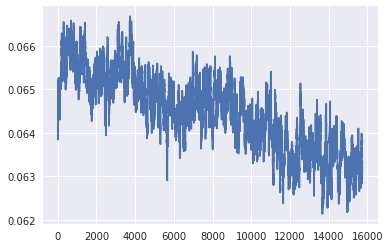

In [178]:
learn.sched.plot_loss()

In [160]:
lr = 0.05
lrs = np.array([lr/9, lr/3, lr])

learn.unfreeze()
learn.bn_freeze(True)
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2, metrics=[f1])

epoch      trn_loss   val_loss   f1         
    0      0.065197   0.062942   0.462194  
    1      0.065297   0.062729   0.463321  
    2      0.064713   0.062489   0.468134  
    3      0.065304   0.06255    0.457411  
    4      0.064544   0.062141   0.47184   
    5      0.064072   0.061859   0.475904  
    6      0.062824   0.061784   0.475552  



[array([ 0.06178]), 0.47555245041794264]

/home/josh/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


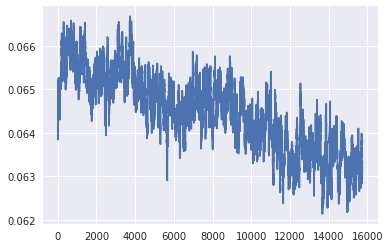

In [176]:
learn.sched.plot_loss()

In [180]:
learn.load('80k_unfrozen_vgg_l062_03.h5')

In [177]:
learn.save('80k_unfrozen_vgg_l062_03.h5')

In [175]:
"test"

'test'

In [35]:
f1_score(data.val_y, (r > 0.5).astype('int'), average='micro')

0.50930764701955

epoch      trn_loss   val_loss   f1         
    0      0.073951   0.068929   0.400015  
    1      0.07083    0.066772   0.420267  
    2      0.06885    0.066089   0.430194  
    3      0.068745   0.065344   0.429623  
    4      0.066999   0.064264   0.44773   
    5      0.06646    0.063691   0.454684  
    6      0.064944   0.063579   0.455228 

## Smaller dataset

epoch      trn_loss   val_loss   f1         
    0      0.066983   0.06522    0.425546  
    1      0.066745   0.064873   0.428255  
    2      0.065601   0.064245   0.437942  
    3      0.065818   0.064258   0.438524  
    4      0.064589   0.0636     0.444416  
    5      0.063011   0.063096   0.450158  
    6      0.063714   0.062969   0.451249  

epoch      trn_loss   val_loss   f1         
    0      0.06925    0.066507   0.410306  
    1      0.067576   0.06488    0.427754  
    2      0.066472   0.063824   0.438416  
    3      0.065884   0.063242   0.439078  
    4      0.064314   0.062332   0.449727  
    5      0.062504   0.061674   0.461273  
    6      0.061869   0.061471   0.464788  

epoch      trn_loss   val_loss   f1   
    0      0.058538   0.059815   0.489146  
    1      0.058188   0.060192   0.490329  
    2      0.056603   0.059689   0.493746  
    3      0.058777   0.06046    0.484378  
    4      0.057168   0.059737   0.490181  
    5      0.054945   0.059664   0.498285  
    6      0.053811   0.0596     0.499312  

/home/josh/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


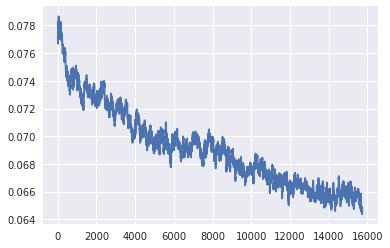

In [16]:
learn.sched.plot_loss()

## Validation

In [110]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, axis=0)
y_pred = (preds > 0.3).astype('int')

In [108]:
f1_score(y, y_pred, average='micro')

0.55765063050376285

## Testing

In [89]:
multi_preds, y = learn.TTA(is_test=True)
preds = np.mean(multi_preds, axis=0)

In [96]:
len(data.classes)

226

In [98]:
y_pred = (preds > 0.5).astype('int')

In [120]:
import matplotlib.pyplot as plt

In [124]:
data.test_ds[0][0].shape

(3, 64, 64)

## Stacking

In [270]:
res = ConvLearner.pretrained(resnet50, data)
res.load('80k_unfrozen_res50_l064_07.h5')

In [269]:
vgg = ConvLearner.pretrained(vgg16, data)
vgg.load('80k_unfrozen_vgg_l062_03.h5')

In [271]:
vgg = vgg.model
res = res.model

In [11]:
import torch.nn as nn

In [275]:
class CombineModels(nn.Module):
    def __init__(self, vgg, res):
        super().__init__()
        self.vgg = vgg
        self.res = res
        
        self.vgg_out = vgg[-2].out_features
        self.res_out = res[-2].out_features
        self.linear = nn.Linear(self.vgg_out + self.res_out, self.vgg_out)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = torch.cat([self.vgg(x), self.res(x)], 1)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [277]:
combined = CombineModels(vgg, res).cuda()

In [285]:
params = list(combined.named_parameters())

In [308]:
x, y = next(iter(data_loader.trn_dl))

In [315]:
type(y)

torch.cuda.FloatTensor

In [286]:
for name, param in params:
    if name in ('linear.weight', 'linear.bias'):
        param.requires_grad = True
    else:
        param.requires_grad = False

In [294]:
optimizer = torch.optim.SGD([p for n, p in params[-2:]], lr=0.01)

In [316]:
criterion = torch.nn.modules.loss.BCELoss()

0.69144666

In [338]:
len(data_loader.trn_dl)

2248

In [339]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(data_loader.trn_dl, 0):
        inputs, labels = data

        optimizer.zero_grad()

        inputs = torch.autograd.Variable(inputs).cuda()
        labels = torch.autograd.Variable(labels).cuda()
        outputs = combined(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.cpu().numpy()[0]
        if i % 100 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.000
[1,   101] loss: 0.033
[1,   201] loss: 0.033
[1,   301] loss: 0.033
[1,   401] loss: 0.033
[1,   501] loss: 0.032
[1,   601] loss: 0.032
[1,   701] loss: 0.032
[1,   801] loss: 0.032
[1,   901] loss: 0.032
[1,  1001] loss: 0.032
[1,  1101] loss: 0.032
[1,  1201] loss: 0.031
[1,  1301] loss: 0.031
[1,  1401] loss: 0.031
[1,  1501] loss: 0.031
[1,  1601] loss: 0.031
[1,  1701] loss: 0.031
[1,  1801] loss: 0.031
[1,  1901] loss: 0.030
[1,  2001] loss: 0.030
[1,  2101] loss: 0.030
[1,  2201] loss: 0.030
[2,     1] loss: 0.000
[2,   101] loss: 0.030
[2,   201] loss: 0.030
[2,   301] loss: 0.030
[2,   401] loss: 0.029
[2,   501] loss: 0.029
[2,   601] loss: 0.029
[2,   701] loss: 0.029
[2,   801] loss: 0.029
[2,   901] loss: 0.029
[2,  1001] loss: 0.029
[2,  1101] loss: 0.029
[2,  1201] loss: 0.028
[2,  1301] loss: 0.028
[2,  1401] loss: 0.028
[2,  1501] loss: 0.028
[2,  1601] loss: 0.028
[2,  1701] loss: 0.028
[2,  1801] loss: 0.028
[2,  1901] loss: 0.028
[2,  2001] 

In [340]:
with open('combined_model_027.pkl', 'wb') as f:
    torch.save(combined, f)

/home/josh/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type CombineModels. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [347]:
x, y = next(iter(data_loader.val_dl))
x = torch.autograd.Variable(x).cuda()

In [351]:
y_pred = combined(x).data.cpu().numpy()
y = y.cpu().numpy()

In [368]:
f1_score(y, (y_pred > 0.25).astype('int'), average='micro')

0.049458628525598181

In [202]:
classes = np.arange(len(y_pred[i])) * y_pred[i]
classes[classes > 0]

array([ 59,  70,  76,  99, 175])

In [203]:
classes = np.arange(len(y_pred[j])) * y_pred[j]
classes[classes > 0]

array([  8,  59,  70,  99, 175])

In [214]:
indexes = y_pred * np.array([np.arange(len(y_pred[0])) for _ in np.arange(len(y_pred))])
indexes = indexes.tolist()

In [241]:
test_files = [f.split('/')[1].split('.')[0] for f in data.test_ds.fnames]
test_labels = [" ".join([data.classes[index] for index in row if index > 0]) for row in indexes]

In [256]:
test_df = pd.DataFrame({'image_id': test_files, 'label_id': test_labels})
test_df['image_id'] = test_df['image_id'].astype('int')
test_df = test_df.sort_values('image_id').reset_index(drop=True)

In [260]:
test_df.to_csv('submission_01_jc.csv', index=False)

In [205]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import os

In [23]:
os.listdir('../data/train/')[:5]

['train_52682.jpg',
 'train_34603.jpg',
 'train_49693.jpg',
 'train_62929.jpg',
 'valid_8366.jpg']

In [24]:
os.stat('../data/train/train_52600.jpg')

os.stat_result(st_mode=33204, st_ino=1016467, st_dev=2049, st_nlink=1, st_uid=1003, st_gid=1004, st_size=11818, st_atime=1527027170, st_mtime=1527023648, st_ctime=1527023648)

In [28]:
from datetime import datetime

In [ ]:
os.path.get

In [39]:
dtime = os.path.getmtime('../data/train/train_52600.jpg')
str(datetime.fromtimestamp(dtime))

'2018-05-22 21:14:08.018030'

In [84]:
files = pd.DataFrame({'filename': os.listdir('../data/train')})
files = files[files['filename'].str.endswith('.jpg')]

In [85]:
def get_mtime(filename):
    mtime = os.path.getmtime(f'../data/train/{filename}')
    return datetime.fromtimestamp(mtime)

In [86]:
files['mtime'] = files['filename'].apply(get_mtime)

In [87]:
files['day'] = files['mtime'].apply(lambda date: date.day)